The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



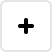
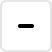
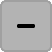
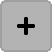
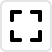
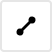
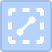

In [1]:
from lets_plot import *
from lets_plot.geo_data import *

from lets_plot.settings_utils import geocoding_service
#LetsPlot.set(geocoding_service(url='http://3.86.228.157:3025'))

import pandas as pd

LetsPlot.setup_html()

In [2]:
income_all = pd.read_csv('../data/US_household_income_2017.csv', encoding='latin-1')
income_all.head(3)

id  State_Code State_Name State_ab          County        City  \
0  1011000           1    Alabama       AL   Mobile County   Chickasaw   
1  1011010           1    Alabama       AL  Barbour County  Louisville   
2  1011020           1    Alabama       AL   Shelby County  Columbiana   

             Place  Type Primary  Zip_Code Area_Code     ALand  AWater  \
0   Chickasaw city  City   place     36611       251  10894952  909156   
1        Clio city  City   place     36048       334  26070325   23254   
2  Columbiana city  City   place     35051       205  44835274  261034   

         Lat        Lon   Mean  Median  Stdev        sum_w  
0  30.771450 -88.079697  38773   30506  33101  1638.260513  
1  31.708516 -85.611039  37725   19528  43789   258.017685  
2  33.191452 -86.615618  54606   31930  57348   926.031000

In [3]:
income_by_state = income_all.groupby("State_Name", as_index=False)["Mean"].mean()
income_by_state.head(3)

State_Name          Mean
0    Alabama  53612.925856
1     Alaska  77670.209524
2    Arizona  62578.071313

In [4]:
income_by_county = income_all.groupby(["State_Name","County"], as_index=False)["Mean"].mean()
income_by_county.head(3)

State_Name          County          Mean
0    Alabama  Autauga County  53735.557235
1    Alabama  Barbour County  37725.000000
2    Alabama   Blount County  55127.000000

In [5]:
us48 = regions_state('us-48').to_data_frame()['found name'].tolist()

In [35]:
data = income_by_county
data = data[data.State_Name.isin(us48)]
row_count, _ = data.shape
print(row_count)

1629


In [36]:
counties = regions_builder2('county', 
                            names=data["County"].tolist(), 
                            states=data["State_Name"].tolist())\
    .drop_not_matched()\
    .build()

In [37]:
counties.to_data_frame()

id            request         found name    state
0     3697517     Autauga County     Autauga County  Alabama
1     3701595     Barbour County     Barbour County  Alabama
2     3697523      Blount County      Blount County  Alabama
3     3697525      Butler County      Butler County  Alabama
4     3701599    Chambers County    Chambers County  Alabama
...       ...                ...                ...      ...
1612   578649      Platte County      Platte County  Wyoming
1613   577321    Sheridan County    Sheridan County  Wyoming
1614  2822805  Sweetwater County  Sweetwater County  Wyoming
1615   578695       Uinta County       Uinta County  Wyoming
1616   578671      Weston County      Weston County  Wyoming

[1617 rows x 4 columns]

In [38]:
centroids=counties.centroids()
centroids

request         found name    state  \
0        Autauga County     Autauga County  Alabama   
1        Barbour County     Barbour County  Alabama   
2         Blount County      Blount County  Alabama   
3         Butler County      Butler County  Alabama   
4       Chambers County    Chambers County  Alabama   
...                 ...                ...      ...   
1612      Platte County      Platte County  Wyoming   
1613    Sheridan County    Sheridan County  Wyoming   
1614  Sweetwater County  Sweetwater County  Wyoming   
1615       Uinta County       Uinta County  Wyoming   
1616      Weston County      Weston County  Wyoming   

                         geometry  
0      POINT (-86.65117 32.50771)  
1      POINT (-85.39351 31.88341)  
2      POINT (-86.53304 34.01333)  
3      POINT (-86.67532 31.73537)  
4      POINT (-85.39419 32.92209)  
...                           ...  
1612  POINT (-104.96764 42.12731)  
1613  POINT (-106.90375 44.77929)  
1614  POINT (-108.98868 41.63776)  
1615  POINT (-110.54782 41.28135)  
1616  POINT (-104.56841 43.84001)  

[1617 rows x 4 columns]

In [39]:
# map_join is lacking multi-key support, so we use pandas.merge
data_with_geometry = centroids.merge(data, left_on=['request', 'state'], right_on=['County', 'State_Name'])
data_with_geometry

request         found name    state  \
0        Autauga County     Autauga County  Alabama   
1        Barbour County     Barbour County  Alabama   
2         Blount County      Blount County  Alabama   
3         Butler County      Butler County  Alabama   
4       Chambers County    Chambers County  Alabama   
...                 ...                ...      ...   
1612      Platte County      Platte County  Wyoming   
1613    Sheridan County    Sheridan County  Wyoming   
1614  Sweetwater County  Sweetwater County  Wyoming   
1615       Uinta County       Uinta County  Wyoming   
1616      Weston County      Weston County  Wyoming   

                         geometry State_Name             County           Mean  
0      POINT (-86.65117 32.50771)    Alabama     Autauga County   53735.557235  
1      POINT (-85.39351 31.88341)    Alabama     Barbour County   37725.000000  
2      POINT (-86.53304 34.01333)    Alabama      Blount County   55127.000000  
3      POINT (-86.67532 31.73537)    Alabama      Butler County   27993.000000  
4      POINT (-85.39419 32.92209)    Alabama    Chambers County   45107.000000  
...                           ...        ...                ...            ...  
1612  POINT (-104.96764 42.12731)    Wyoming      Platte County  127999.000000  
1613  POINT (-106.90375 44.77929)    Wyoming    Sheridan County   68733.000000  
1614  POINT (-108.98868 41.63776)    Wyoming  Sweetwater County       0.000000  
1615  POINT (-110.54782 41.28135)    Wyoming       Uinta County   89130.000000  
1616  POINT (-104.56841 43.84001)    Wyoming      Weston County   69215.000000  

[1617 rows x 7 columns]

In [40]:
ggplot() + geom_point(aes(color='Mean'), data_with_geometry)

In [41]:
boundaries=counties.boundaries()
boundaries

request         found name    state  \
0        Autauga County     Autauga County  Alabama   
1        Barbour County     Barbour County  Alabama   
2         Blount County      Blount County  Alabama   
3         Butler County      Butler County  Alabama   
4       Chambers County    Chambers County  Alabama   
...                 ...                ...      ...   
1612      Platte County      Platte County  Wyoming   
1613    Sheridan County    Sheridan County  Wyoming   
1614  Sweetwater County  Sweetwater County  Wyoming   
1615       Uinta County       Uinta County  Wyoming   
1616      Weston County      Weston County  Wyoming   

                                               geometry  
0     MULTIPOLYGON (((-86.83594 32.39852, -86.83594 ...  
1     MULTIPOLYGON (((-85.78125 31.65338, -85.60547 ...  
2     MULTIPOLYGON (((-86.48438 34.16182, -86.30859 ...  
3     MULTIPOLYGON (((-86.83594 31.95216, -86.83594 ...  
4     MULTIPOLYGON (((-85.07812 32.84267, -85.07812 ...  
...                                                 ...  
1612  MULTIPOLYGON (((-105.29297 42.55308, -105.2929...  
1613  MULTIPOLYGON (((-107.92969 44.96480, -107.9296...  
1614  MULTIPOLYGON (((-110.03906 42.03297, -110.0390...  
1615  MULTIPOLYGON (((-111.09375 41.24477, -111.0937...  
1616  MULTIPOLYGON (((-105.11719 43.58039, -105.1171...  

[1617 rows x 4 columns]

In [42]:
# map_join is lacking multi-key support, so we use pandas.merge
data_with_boundaries = boundaries.merge(data, left_on=['request', 'state'], right_on=['County', 'State_Name'])
data_with_boundaries


request         found name    state  \
0        Autauga County     Autauga County  Alabama   
1        Barbour County     Barbour County  Alabama   
2         Blount County      Blount County  Alabama   
3         Butler County      Butler County  Alabama   
4       Chambers County    Chambers County  Alabama   
...                 ...                ...      ...   
1612      Platte County      Platte County  Wyoming   
1613    Sheridan County    Sheridan County  Wyoming   
1614  Sweetwater County  Sweetwater County  Wyoming   
1615       Uinta County       Uinta County  Wyoming   
1616      Weston County      Weston County  Wyoming   

                                               geometry State_Name  \
0     MULTIPOLYGON (((-86.83594 32.39852, -86.83594 ...    Alabama   
1     MULTIPOLYGON (((-85.78125 31.65338, -85.60547 ...    Alabama   
2     MULTIPOLYGON (((-86.48438 34.16182, -86.30859 ...    Alabama   
3     MULTIPOLYGON (((-86.83594 31.95216, -86.83594 ...    Alabama   
4     MULTIPOLYGON (((-85.07812 32.84267, -85.07812 ...    Alabama   
...                                                 ...        ...   
1612  MULTIPOLYGON (((-105.29297 42.55308, -105.2929...    Wyoming   
1613  MULTIPOLYGON (((-107.92969 44.96480, -107.9296...    Wyoming   
1614  MULTIPOLYGON (((-110.03906 42.03297, -110.0390...    Wyoming   
1615  MULTIPOLYGON (((-111.09375 41.24477, -111.0937...    Wyoming   
1616  MULTIPOLYGON (((-105.11719 43.58039, -105.1171...    Wyoming   

                 County           Mean  
0        Autauga County   53735.557235  
1        Barbour County   37725.000000  
2         Blount County   55127.000000  
3         Butler County   27993.000000  
4       Chambers County   45107.000000  
...                 ...            ...  
1612      Platte County  127999.000000  
1613    Sheridan County   68733.000000  
1614  Sweetwater County       0.000000  
1615       Uinta County   89130.000000  
1616      Weston County   69215.000000  

[1617 rows x 7 columns]

In [43]:
map_theme = theme(axis_line="blank", axis_text="blank", axis_title="blank", axis_ticks="blank") + ggsize(900, 400)
ggplot() + geom_map(aes(fill='Mean'), data_with_boundaries) + scale_fill_gradient(low="#007BCD", high="#FE0968", name="Mean income") + map_theme

Issues

In [21]:
# drop_not_found breaks parents - these columns are missing
regions_builder2('county', 
                 names=['Wayne County', 'Not existing County', 'Anson County'],
                states=['New York', 'New York', 'North Carolina'],
                countries=['usa', 'usa', 'usa'])\
    .drop_not_found()\
    .build()

        id       request    found name           state country
0  3676279  Wayne County  Wayne County        New York     usa
1  5057345  Anson County  Anson County  North Carolina     usa

In [22]:
# issue with parents geocoding - unexpected ranking behaviour results in broken responses.
# When mulitply object found by one request ambiguous response is generated without use of ranking by weight. 
# Ambiguous response is also borken - it returns success response with first namesake object ¯\_(ツ)_/¯
regions_builder2('county', 
                 names=['Wayne County', 'Essex County'],
                states=['New York', 'Virginia'],
                countries=['usa', 'usa'])\
    .build()

        id       request    found name     state country
0  3676279  Wayne County  Wayne County  New York     usa
1  5068353  Essex County  Essex County  Virginia     usa

In [23]:
# not informative error message
regions_builder2('county', 
                 names=['Wayne County', 'Essex County'],
                states=['New York', 'Virginia'],
                countries=['usa'])\
    .build()

ValueError: Countries count(1) != names count(2)

In [24]:
# regions in parent is not yet supported
state_regions = regions_builder2('state', names=data["State_Name"].tolist(), countries=['uSa'] * row_count).build()
counties_via_regions = regions_builder2('county', 
                            names=data["County"].tolist(), 
                            states=state_regions)\
    .build()
counties_via_regions.to_data_frame()

ValueError: No objects were found for Skagway Municipality, District of, District of Columbia, Hawaii County, Kauai County, St. Joseph County, LaSalle Parish, St. Clair County, St. Joseph County, St. Louis County, St. Charles County, St. Louis County, Ste. Genevieve County, St. Lawrence County, Adjuntas Municipio, Aguada Municipio, Aguadilla Municipio, Aguas Buenas Municipio, Aibonito Municipio, Carolina Municipio, Corozal Municipio, Dorado Municipio, Gurabo Municipio, Humacao Municipio, Juncos Municipio, Lares Municipio, Las Piedras Municipio, Maunabo Municipio, Morovis Municipio, Patillas Municipio, Ponce Municipio, Río Grande Municipio, Sabana Grande Municipio, Santa Isabel Municipio, Toa Alta Municipio, Toa Baja Municipio, Villalba Municipio, Yabucoa Municipio.


In [59]:
regions_builder2('state', names=['florida'], scope='Uruguay').build()

       id  request found name
0  324101  florida    Florida

In [56]:
regions_builder2('state', names=['florida', 'florida'], countries=['usa', 'Uruguay']).build()

        id  request found name  country
0   324101  florida    Florida      usa
1  3270329  florida    Florida  Uruguay